<a href="https://colab.research.google.com/github/KamranRiyaz/MachineLearning-Using-Python/blob/main/k_means_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Means Clustering

## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the dataset

In [2]:
df = pd.read_csv('Mall_Customers.csv')
X = df.iloc[:,[3,4]].values #used to select a list of indicies

## Using the elbow method to find the optimal number of clusters

using WCSS find optimal no of clusters for the dataset

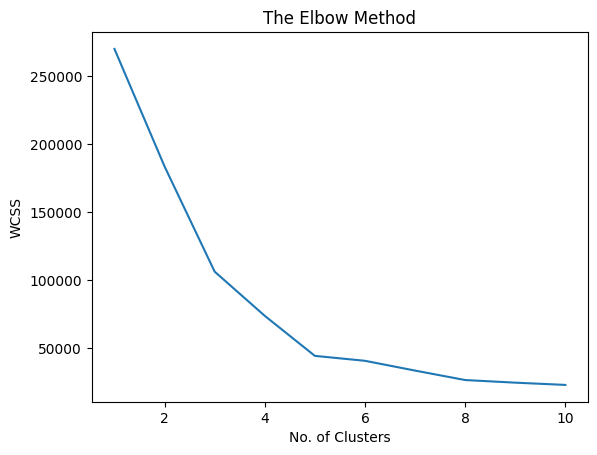

In [4]:
from sklearn.cluster import KMeans
WCSS = []
for i in range(1,11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
  #the second paramter is to avoid random initialization trap
  kmeans.fit(X)
  WCSS.append(kmeans.inertia_)
  #inertia_ attribute of kmeans class stores the calculated wcss

#plotting the WCSS vs No. of Clusters
plt.plot(range(1,11),WCSS)
plt.xlabel('No. of Clusters')
plt.ylabel('WCSS')
plt.title('The Elbow Method')
plt.show()

## Training the K-Means model on the dataset

In [12]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

In [13]:
print(y_kmeans)

[4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 0 4 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 3 1 0 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 0 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


## Visualising the clusters

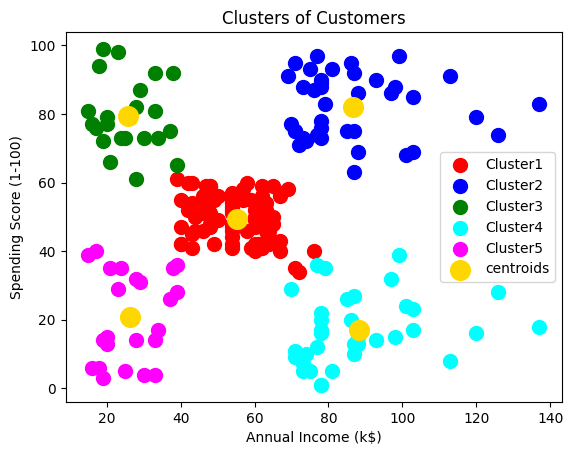

In [37]:
cmap = ['red','blue','green','cyan','magenta']
clusters = np.unique(y_kmeans)
for i in clusters:
  plt.scatter(X[y_kmeans == i, 0], X[y_kmeans == i, 1], s = 100, c = cmap[i], label = f'Cluster{i + 1}')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c = 'gold', label = 'centroids', s = 200)
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()